<a href="https://colab.research.google.com/github/ugururesin/Deep_Learning_Projects/blob/main/RNN_LSTM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Content

1. LSTM Implementation
2. Visualize the results and convergence
3. Multi layer LSTM implementation
4. Variable sized inputs

#### Toy Example

In [1]:
## IMPORTING LIBRARIRES
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## DATA CREATION
inputs = [[[i+j] for i in range(5)] for j in range(100)]
target = [(i+5)  for i in range(100)]

In [3]:
inputs[0:5]

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]]]

In [4]:
target[0:5]

[5, 6, 7, 8, 9]

In [5]:
# DATA SPLITTING
x_train, x_test, y_train, y_test = train_test_split(inputs , target, test_size=.2, random_state=4)

In [6]:
# RNN MODEL
model = Sequential()

model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=False))
#1 is the OUTPUT-SIZE, batch_input_shape: #inputs, length_inputs, length_each vector

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=0)

In [9]:
results = model.predict(x_test)

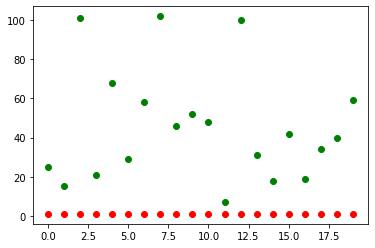

In [10]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), results, c='r')
plt.show()

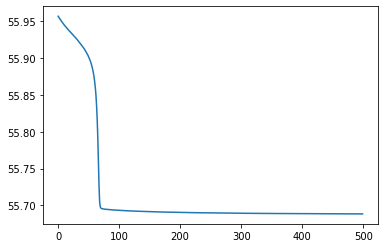

In [11]:
plt.plot(history.history['loss'])
plt.show()

As it can be seen on the plot, the loss is too high!  
The main reason is that the data was not normalized!

Thus, in order to increase the loss, **the data need to be normalized** first!

In [12]:
## DATA NORMALIZATION
normal_inputs = [[[(i+j)/100] for i in range(5)] for j in range(100)]
normal_target = [(i+5)/100    for i in range(100)]

In [13]:
normal_inputs[0:5]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [14]:
# DATA SPLITTING
x_train, x_test, y_train, y_test = train_test_split(normal_inputs , normal_target, test_size=.2, random_state=4)

# RNN MODEL
model = Sequential()

model.add(LSTM((1), batch_input_shape=(None,5,1), return_sequences=False))
#1 is the OUTPUT-SIZE, batch_input_shape: #inputs, length_inputs, length_each vector

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), verbose=0)

results = model.predict(x_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


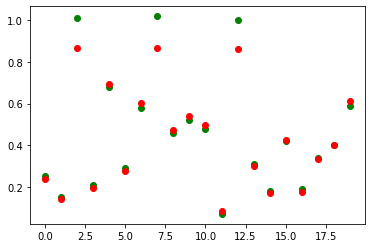

In [15]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), results, c='r')
plt.show()

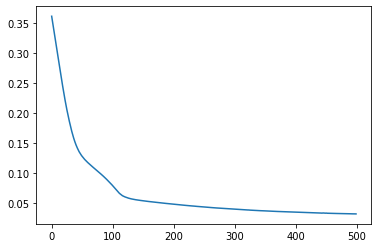

In [16]:
plt.plot(history.history['loss'])
plt.show()